<a href="https://colab.research.google.com/github/Navneet2409/Flower-Classification/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center><u><h1>Flower Classification using Transfer Learning</center></u></h1>

There are millions of beautiful flowers bursting around every corner, & we've been constantly awed by the beauty & uniqueness of each flower. Classifying different flowers from one another is indeed a challenging task, as there's a plethora of flowers to classify & flowers can appear similar to each other. However, classifying different flower species will be advantageous in the fields such as the pharmaceutical industry, botany, agricultural, & trade activities, which is why we thought of performing this task.<br>
<br>
The main aim of this project is to solve a Supervised Image Classification problem of classifying the flower types - rose, daisy, dandelion, sunflower, & tulip. In the end, we'll have a trained model, which can predict the class of the flower using the Convolutional Neural Networks (CNN).<br>

The dataset consists of 5 classes of flower species - rose, daisy, dandelion, sunflower, & tulip, each having more than 800 images.


This project follows a basic workflow:

1. Examine and understand data
2. Build an input pipeline
3. Build the model
4. Train the model
5. Test the model


Initially, the following libraries were imported to use in the data conversion process:

Here we are going to import necessary libraries:<br>
**Matplotlib** for  data visualization<br>
**Numpy** to perform array and matrix operations.<br>
**Os** provides functions for interacting with the operating system.<br>
**PIL** Python Imaging Library which provides the python interpreter with image editing capabilities. <br>
**TensorFlow** provides a collection of workflows to develop and train models.<br>
**keras** is used to make the implementation of neural networks easy.<br>
**Sequential** the core idea of Sequential API is simply arranging the Keras layers in a sequential order.<br>

In [46]:
#Import above mentioned libraries.
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

Now, the next step is to import the dataset

Use the below mentioned link for dataset

### Dataset link: https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz



## **Import dataset**

Now here we'll be working on the Tensorflow flower classification problem. The data set contains of 5 classes of flowers, for which we will try to build a classifier.

In [3]:
# import pathlib
from pathlib import Path

# dataset_url = link of the dataset
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = Path(data_dir)

228813984/228813984 [==============================] - 3s 0us/step


In [4]:
# print the data_dir
print(data_dir)

/root/.keras/datasets/flower_photos


Now we will visualize each class of dataset with help of glob.<br>
In Python, the glob module is used to retrieve files/pathnames matching a specified pattern.<br>
Refer:https://docs.python.org/3/library/glob.html

/root/.keras/datasets/flower_photos/dandelion/8905148527_ba9f55cd78.jpg


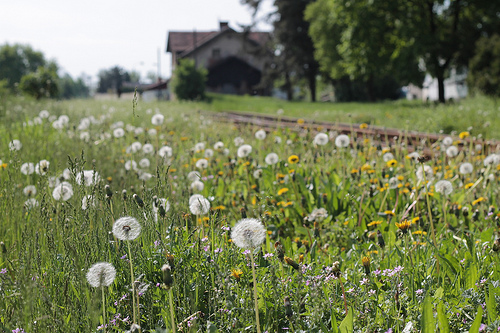

In [5]:
# visualizing the dandelion class

dandelion = list(data_dir.glob('dandelion/*'))
print(dandelion[0])
PIL.Image.open(str(dandelion[0]))

As we have visualize the dandelion class now we will visualize for all the class.

/root/.keras/datasets/flower_photos/tulips/391477275_7c2f50a1a7_m.jpg


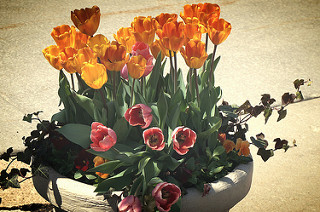

In [6]:
# we will visualize for Tuplips

tulips = list(data_dir.glob('tulips/*'))
print(tulips[3])
PIL.Image.open(str(tulips[0]))

/root/.keras/datasets/flower_photos/daisy/14569895116_32f0dcb0f9.jpg


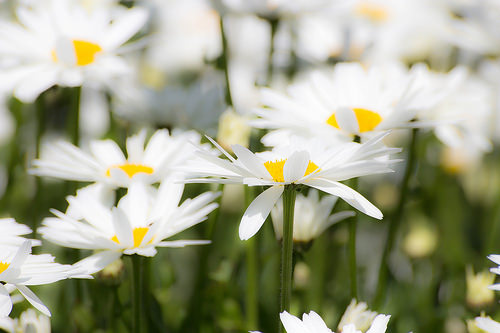

In [7]:
# now we will visualize for Daisy

daisy = list(data_dir.glob('daisy/*'))
print(daisy[0])
PIL.Image.open(str(daisy[0]))

/root/.keras/datasets/flower_photos/sunflowers/16832961488_5f7e70eb5e_n.jpg


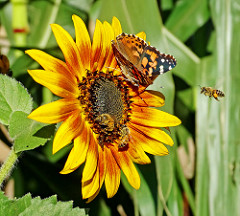

In [8]:
# now we will visualize for Sunflower

sunflowers = list(data_dir.glob('sunflowers/*'))
print(sunflowers[3])
PIL.Image.open(str(sunflowers[0]))

/root/.keras/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg


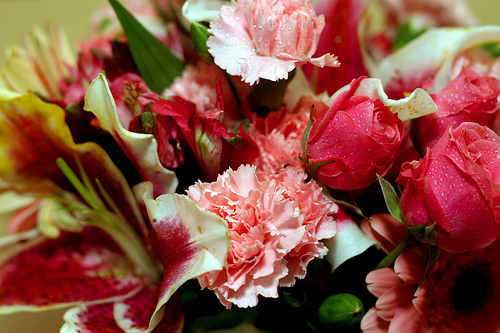

In [9]:
# now we will visualize for Roses

roses = list(data_dir.glob('roses/*'))
print(roses[3])
PIL.Image.open(str(roses[0]))


Now we split our dataset into training and validation set.<br>
First,We will define our image height[180] and image weight[180] and then creates a variable called batch_size, which is set to 32.<br>
The code then defines train_ds as an image dataset from directory data_dir with validation split 0.2 and subset training.<br>
The seed 123 is used for randomness in the process of generating images for this dataset.<br>
The code will split the validation set in half and keep only the training set.

In [10]:
# take img height and img width as 180
img_height, img_width =180,180

# take batch size as 32
batch_size =32

# Preprocess the training data i.e., train_ds
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode ='categorical',
    validation_split =0.2,
    subset= 'training',
    seed =123,
    image_size=(img_height,img_width),
    batch_size=batch_size
    )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


From the above code, some things need to be noted:

1. We have reformatted the input to a dimension of 180,180. This ensures uniformity across all images. We can change this according to your custom problem.

2. We mention the validation split as 0.2 This means that 80% of data will be reserved for training while 20% will be used for validation.

3. We are keeping the batch size at 32. If someone is working on a system with a lower ram configuration, can reduce the batch size further.

4. We mention subset as training, which means we are first creating the training subset.

As we have created for training dataset, Now we will create for validation dataset.

In [11]:
# preprocess the validation data i.e., val_ds
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode ='categorical',
    validation_split =0.2,
    subset= 'validation',
    seed =123,
    image_size=(img_height,img_width),
    batch_size=batch_size
    )

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
# create a variable named class_names which will be equal to trian_ds.class_names
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# print the class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


#Visualize the data
Here are the first six images from the training dataset.
The code starts by importing matplotlib.pyplot as plt and then creates a figure with the figsize=(10, 10) parameter. Next, it iterates through all of the images in train_ds and takes one at a time to create an image on the screen for each one.Then it creates three subplots that are numbered 1-3 so that they can be easily distinguished from each other.
- The subplot is created with ax = plt.subplot(2, 3).
- This tells matplotlib to create a new figure with two rows and three columns (the number after "sub" specifies how many rows and columns there will be).
- The subplot is created which displays an image on the screen using numpy's astype function (which converts data types between different Python datatypes) followed by class_names[labels[i]] which assigns labels to each row based on their corresponding classes in our dataset.

Finally, we use plt.axis("off") to turn off any axis labels or tick marks because the code attempts to create a figure with 6 subplots (2 rows and 3 columns).

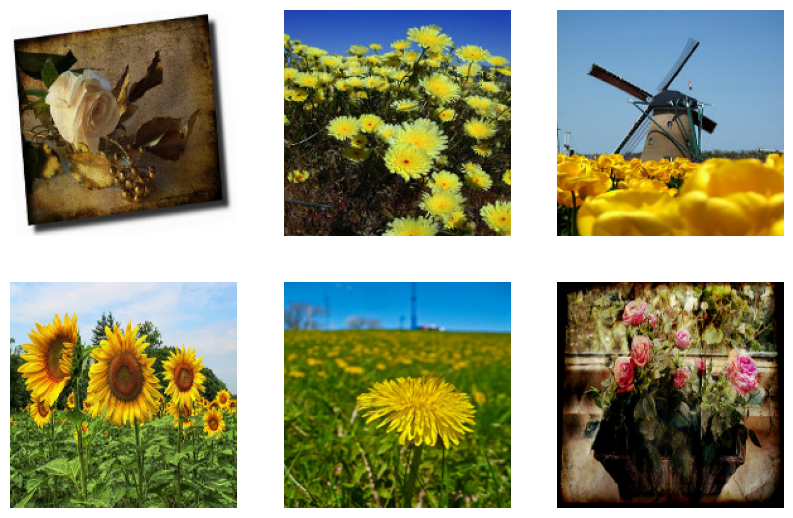

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.axis('off')

## Why Neural Network?
A Neural network is a system of software patterned after the working of neurons in the human brain. Just like how the human brain has interconnected neurons that process information, a Neural Network also has interconnected artificial neurons called nodes that take some input, and process those inputs in layers to produce the output. A neural network has 3 layers:

1. Input Layer: This layer accepts input in the form of an array of numbers.
2. Hidden Layers: This layer performs some calculations on the given input & does feature extraction on the data to locate patterns. There are weights assigned in each layer whose weighted sum is calculated with the inputs & a bias is added. Weights are random values that are assigned between each node in the network. Different activation functions are applied to the hidden layers for extracting specific features. A network can contain multiple hidden layers.
3. Output Layer: This layer produces the desired output after several iterations

### Why the Convolutional Neural Network (CNN) for image classification & not the simple Neural Network?

Convolutional Neural Network is one of the classes of the deep learning Neural Networks. They're most commonly used to analyze visual imagery & are frequently working behind the scenes in image classification. They can be found at the core of everything from Facebook's photo tagging to self-driving cars. They're now a crucial part of a lot of sectors from healthcare to security.

Image classification is the process of taking an input (like a picture) & outputting a class (like rose or tulip) or a probability that the input is a particular class (“there's a 90% probability that this input is a rose”).

CNNs have an input layer, hidden layers, & output layer. The hidden layers usually consist of convolutional layers, activation layers, pooling layers, & fully connected layers.

- Convolutional layers : Convolution layer applies a convolution operation to the input for passing the result to the next layer. Each convolution processes the data only for its respective field.

- Activation Function layers: It is used to determine the output of a neural network (like rose/tulip). It can also be attached between two different neural networks. The activation functions could be Sigmoid, RELU, softmax etc..

- Pooling layers : It is responsible for reducing the spatial size of the convoluted feature. Pooling combines the output of neuron cluster at one layer into a single neuron in the next layer.

- Fully connected layer : It connects every neuron in one layer to every neuron in the next layer.

In a convolutional layer, neurons only receive input from a subarea of the previous layer. In a fully connected layer, each neuron receives input from every element of the previous layer.

## **Import the Pre-trained model**


Now this is where the power of transfer learning comes in. From **keras applications**, we can pick and select any of the state-of-the-art models and use it for our problem.



In this Project we are going to use ResNet-50, but the similar procedure can be used for any other model as well.

So, now let's import the model

In [15]:
# declare a variable named resnet_model which will be equal to sequential
resnet_model = Sequential()

# use pretrained_model
pretrained_model = keras.applications.ResNet50(include_top=False, input_shape=(180,180,3), pooling='avg',
                                                classes=5, weights='imagenet')


for layer in pretrained_model.layers:
        layer.trainable =False

resnet_model.add(pretrained_model)

94765736/94765736 [==============================] - 0s 0us/step


Here, we need to note few points on the basis of above code.


1. While importing the ResNet50 class, we mention include_top=False. This ensures that we can add our own custom input and output layers according to our data.
2. We mention the weights='imagenet'. This means that the Resnet50 model will use the weights it learnt while being trained on the imagenet data.
3. Finally, we mention layer.trainable= False in the pretrained model. This ensures that the model does not learn the weights again, saving us a lot of time and space complexity.


Now, that we have imported a pre-trained model, we will also add a fully connected and output layer where actual learning will take place.

So in the input layer we need to use the relu activation function with 512 neurons and in the output layer we need to use the softmax activation function and we are having 5 output neurons corresponding to the 5 classes in our data.

In [16]:
# add flatten
resnet_model.add(Flatten())

# add a Dense layer of 512 neurons and give activation as 'relu'
resnet_model.add(Dense(512, activation='relu'))

# add a dense layer of 5 neurons and give activation as 'softmax'
resnet_model.add(Dense(5, activation='softmax'))

Now, inorder to look at your model architecture, just call the summary attribute.

In [17]:
# call the summary attribute of the model
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


**<center> Model Summary for ResNet-50 <center>**

--------------------------------------
## **NOTE: One key point which needs to get noted is that the total number of parameters in the ResNet50 model is 24 million. But the trainable parameters are only one million.**
--------------------------------------

That is precisely how transfer learning saves us massive time,space and computational complexity.

Now that your model is ready you simply compile it and train it over 10 epochs for now.

In [18]:
# compile the model with Adam(lr=0.001) optimizer, use categorical_crossentropy as loss, and metrics will be equal to accuracy
resnet_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics= 'accuracy')

In [69]:
# train upto 10 epochs
# fit the model in history variable
resnet1 = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10,)

Epoch 1/10
92/92 [==============================] - 14s 118ms/step - loss: 0.0883 - accuracy: 0.9687 - val_loss: 0.4649 - val_accuracy: 0.8883
Epoch 2/10
92/92 [==============================] - 10s 101ms/step - loss: 0.0250 - accuracy: 0.9928 - val_loss: 0.4392 - val_accuracy: 0.8842
Epoch 3/10
92/92 [==============================] - 13s 132ms/step - loss: 0.0087 - accuracy: 0.9990 - val_loss: 0.4897 - val_accuracy: 0.8896
Epoch 4/10
92/92 [==============================] - 9s 99ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4558 - val_accuracy: 0.8910
Epoch 5/10
92/92 [==============================] - 9s 91ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4644 - val_accuracy: 0.8937
Epoch 6/10
92/92 [==============================] - 10s 98ms/step - loss: 7.0177e-04 - accuracy: 1.0000 - val_loss: 0.4676 - val_accuracy: 0.8924
Epoch 7/10
92/92 [==============================] - 10s 100ms/step - loss: 5.7574e-04 - accuracy: 1.0000 - val_loss: 0.4712 - val_accuracy: 0.8

## **Model Evaluation**

For the pupose of evaluation we will be using matplotlib library basically to plot the train and validation accuracy with respect to each epoch. These logs had been basically stored in the variable named history during the time of training.

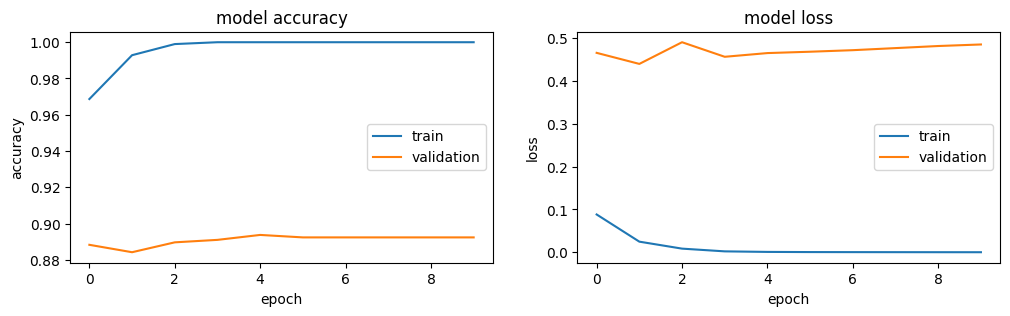

In [70]:
plt.figure(1, figsize = (12,3))

plt.subplot(121)
plt.plot(resnet1.history['accuracy'])
plt.plot(resnet1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.subplot(122)
plt.plot(resnet1.history['loss'])
plt.plot(resnet1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.show()

The model does seem to have overfit a little bit.

For now since the validation accuracy is good enough which is something around 90%.

To counter the overfitting we are going to use dropout layer in our next model.

In [59]:
# declare a variable named resnet_model which will be equal to sequential
model = Sequential()

# use pretrained_model
pretrained_model = keras.applications.ResNet50(include_top=False, pooling='avg',
                                                classes=5, weights='imagenet')


for layer in pretrained_model.layers:
        layer.trainable =False

model.add(pretrained_model)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_10 (Dense)            (None, 256)               524544    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 24,113,541
Trainable params: 525,829
Non-trainable params: 23,587,712
_________________________________________________________________


In [60]:
# compile the model with Adam(lr=0.001) optimizer, use categorical_crossentropy as loss, and metrics will be equal to accuracy
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics= 'accuracy')

resnet2 = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
92/92 [==============================] - 14s 108ms/step - loss: 0.8545 - accuracy: 0.7044 - val_loss: 0.4368 - val_accuracy: 0.8420
Epoch 2/10
92/92 [==============================] - 10s 103ms/step - loss: 0.5299 - accuracy: 0.8059 - val_loss: 0.3650 - val_accuracy: 0.8678
Epoch 3/10
92/92 [==============================] - 9s 91ms/step - loss: 0.4140 - accuracy: 0.8525 - val_loss: 0.3695 - val_accuracy: 0.8733
Epoch 4/10
92/92 [==============================] - 10s 100ms/step - loss: 0.3547 - accuracy: 0.8668 - val_loss: 0.3327 - val_accuracy: 0.8706
Epoch 5/10
92/92 [==============================] - 9s 99ms/step - loss: 0.3212 - accuracy: 0.8811 - val_loss: 0.3319 - val_accuracy: 0.8678
Epoch 6/10
92/92 [==============================] - 10s 97ms/step - loss: 0.2826 - accuracy: 0.8941 - val_loss: 0.3581 - val_accuracy: 0.8610
Epoch 7/10
92/92 [==============================] - 9s 90ms/step - loss: 0.2553 - accuracy: 0.9046 - val_loss: 0.3286 - val_accuracy: 0.8856
Epoch 

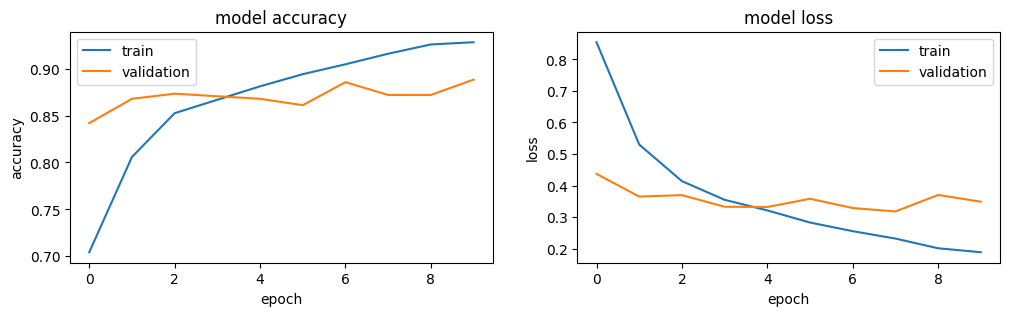

In [67]:
plt.figure(1, figsize = (12,3))

plt.subplot(121)
plt.plot(resnet2.history['accuracy'])
plt.plot(resnet2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.subplot(122)
plt.plot(resnet2.history['loss'])
plt.plot(resnet2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.show()

## **Conclusion:**

In this project, we utilized a Convolutional Neural Network (CNN) to predict flowers of 5 types using the flower recognition dataset(Daisy, Dandelion, Rose, Sunflower, and Tulip). We used ResNet-50 to do transfer learning, training & predictions. The images were first preprocessed into pixels & used for random sample images that we trained our model with.

There is a problem of overfitting which we encountered, we tried to counter it with Dropout layer and our model performance improved significantly. Still with more data and data augmentation techniques we can improve our model.

# **Congratulations! We have done it**